In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro 
sns.set_palette('deep')
sns.set(color_codes='True')

In [3]:
#import the dataset and check first 5 records
df = pd.read_csv('dataset_group.csv',parse_dates=[0])
df.head()

C:\Users\rakes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rakes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rakes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rakes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specif

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [4]:
df.tail()

,Date,Order_id,Product
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent
20640,2020-02-26,1139,shampoo


In [5]:
df.shape

(20641, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


In [7]:
print('Number of duplicates values: {}'.format(df.duplicated().sum()))

Number of duplicates values: 4730


In [8]:
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 0


In [9]:
df.describe(include='all').T

C:\Users\rakes\AppData\Local\Temp\ipykernel_25424\377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,20641,603,2019-08-02 00:00:00,183,2018-01-01,2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,20641.0,NaN,NaN,NaN,NaT,NaT,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0
Product,20641,37,poultry,640,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


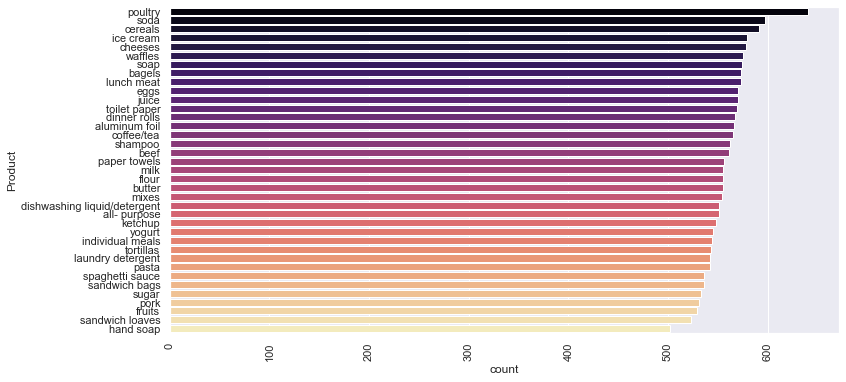

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(y = df['Product'], palette = 'magma', order = df['Product'].value_counts().sort_values(ascending=False).index);
plt.xticks(rotation = 90);